✅ Portfolio scored and saved as 'scored_credit_portfolio.csv'


Matplotlib is building the font cache; this may take a moment.


<Axes: title={'center': 'Risk Tier Distribution'}>

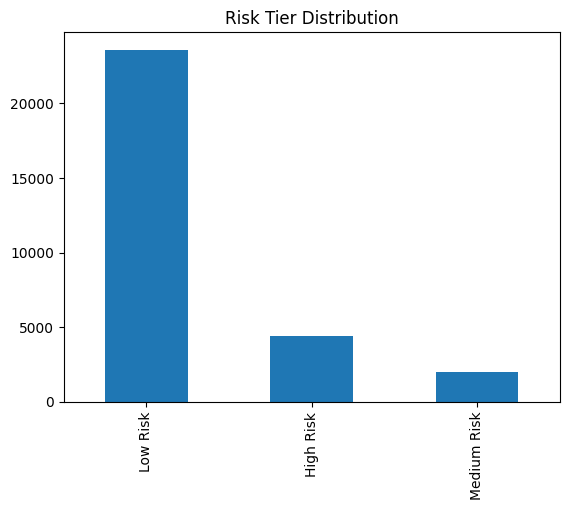

In [1]:
# 3_portfolio_scoring.ipynb

import pandas as pd
import joblib
import numpy as np

# Load cleaned data and model
df = pd.read_csv("default_credit_card_clean.csv")
model = joblib.load("rf_credit_model.pkl")

# Predict probability of default
X = df.drop(columns=["default"])
df["pd"] = model.predict_proba(X)[:, 1]  # PD = Probability of Default

# Segment into risk tiers based on PD thresholds
def assign_risk_tier(pd):
    if pd >= 0.7:
        return "High Risk"
    elif pd >= 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

df["risk_tier"] = df["pd"].apply(assign_risk_tier)

# Save results for dashboard
scored_output = df[["pd", "risk_tier", "default"] + list(X.columns)]
scored_output.to_csv("scored_credit_portfolio.csv", index=False)

print("✅ Portfolio scored and saved as 'scored_credit_portfolio.csv'")
df["risk_tier"].value_counts().plot(kind="bar", title="Risk Tier Distribution")
